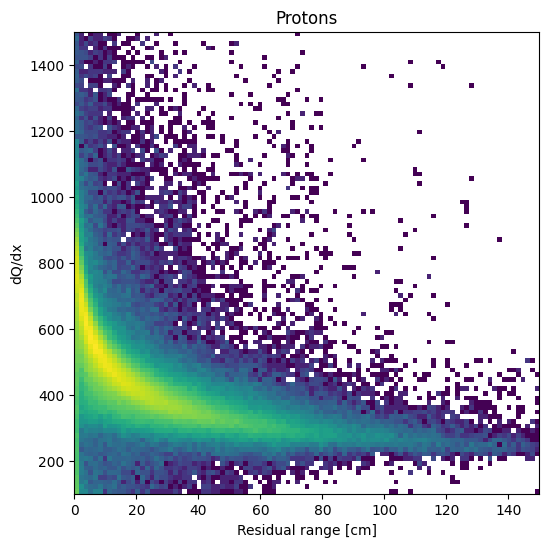

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


# Load the data
file_path = '/Users/jimji/Software/Data_analysis/Research/Recom_code/data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19.root'  # Update with the actual file path
data = uproot.open(file_path)['nuselection']['CalorimetryAnalyzer']

# Variables to load from the ROOT file
variables = ['trk_llr_pid_score', 'longest', 'ntrack', 'trk_sce_end_x', 
             'trk_sce_end_y', 'trk_sce_end_z', 'rr_y', 'dqdx_y']

# Convert the necessary tree in the ROOT file to a Pandas DataFrame
df_data = data.arrays(variables, library="pd", how="zip")

# Filter data to include only entries that meet specific criteria
df_proton = df_data.query('trk_llr_pid_score < 0 and longest==0 and ntrack>1 and '
                          '(trk_sce_end_x > 10 and trk_sce_end_x < 240) and '
                          '(trk_sce_end_y > -100 and trk_sce_end_y < 100) and '
                          '(trk_sce_end_z > 30 and trk_sce_end_z < 1000)')

# Extract relevant arrays for plotting
rr_y_v = np.array([])
dqdx_y_v = np.array([])

for index, entry in df_proton.iterrows():
    rr_y_v = np.concatenate((rr_y_v, [entry['rr_y']]), axis=None)
    dqdx_y_v = np.concatenate((dqdx_y_v, [entry['dqdx_y']]), axis=None)

# Create the 2D histogram plot
fig = plt.figure(figsize=(6, 6))
bins_2d = (np.linspace(0, 150, 100), np.linspace(100, 1500, 100))
plt.hist2d(rr_y_v, dqdx_y_v, bins=bins_2d, norm=colors.LogNorm())
plt.xlabel('Residual range [cm]')
plt.ylabel('dQ/dx')
plt.title('Protons')
plt.show()